In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning

In [35]:
#Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

In [36]:
#Split the data into training and testing sets(80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
)

In [37]:
#Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# PCA reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
# Define parameter grid
max_iters = [10, 50, 100, 500, 1000]
learning_rates = [1, 0.1, 0.01, 0.001]
results = []

In [40]:
#Train and evaluate models under 3 conditions
for scaled, scaled_label in [(False, 'raw'), (True, 'scaled'), ('pca', 'pca')]:
    if scaled == False:
        X_train_used, X_test_used = X_train, X_test
    elif scaled == True:
        X_train_used, X_test_used = X_train_scaled, X_test_scaled
    else:
        X_train_used, X_test_used = X_train_pca, X_test_pca

    for max_iter in max_iters:
        for eta in learning_rates:
            model = Perceptron(max_iter=max_iter, eta0=eta, random_state=42)
            model.fit(X_train_used, y_train)
            y_pred = model.predict(X_test_used)

            acc = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)
            n_iter = model.n_iter_
            converged = n_iter < max_iter 

            results.append({
                'max_iter': max_iter,
                'eta0': eta,
                'scaled': scaled_label,
                'accuracy': acc,
                'n_iter': n_iter,
                'converged': converged,
                'confusion_matrix': cm
            })

C:\Users\Asus\anaconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [41]:
#This warning occurred because the Perceptron model reached the maximum number of iterations (max_iter) before it could fully converge on a stable solution.


In [42]:
#summary table
results_df = pd.DataFrame([{
    'max_iter': r['max_iter'],
    'eta0': r['eta0'],
    'scaled': r['scaled'],
    'accuracy': r['accuracy'],
    'n_iter': r['n_iter'],
    'converged': r['converged']
} for r in results])

print("=== Accuracy Summary ===")
print(results_df.sort_values(by='accuracy', ascending=False))

=== Accuracy Summary ===
    max_iter   eta0  scaled  accuracy  n_iter  converged
37      1000  0.100  scaled  0.933333      14       True
52       500  1.000     pca  0.933333       9       True
40        10  1.000     pca  0.933333       9       True
44        50  1.000     pca  0.933333       9       True
45        50  0.100     pca  0.933333       9       True
29       100  0.100  scaled  0.933333      14       True
48       100  1.000     pca  0.933333       9       True
49       100  0.100     pca  0.933333       9       True
41        10  0.100     pca  0.933333       9       True
25        50  0.100  scaled  0.933333      14       True
53       500  0.100     pca  0.933333       9       True
33       500  0.100  scaled  0.933333      14       True
56      1000  1.000     pca  0.933333       9       True
57      1000  0.100     pca  0.933333       9       True
3         10  0.001     raw  0.933333      10      False
11       100  0.001     raw  0.900000      13       True
32    

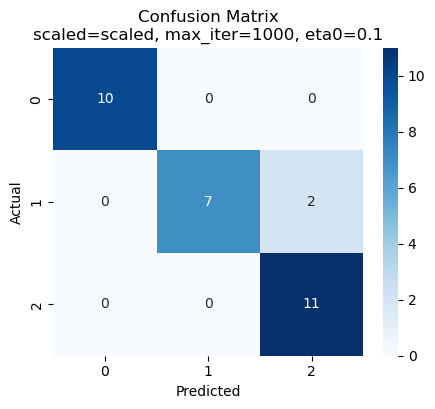

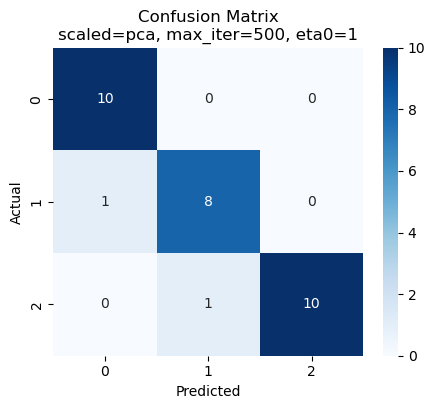

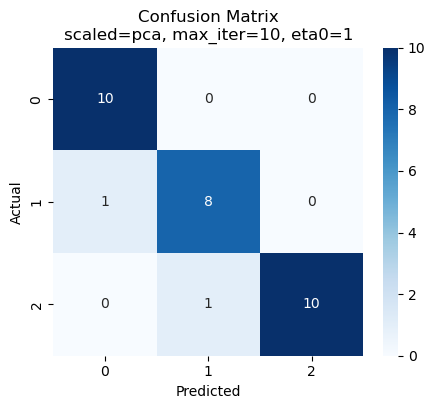

In [43]:
#Plot confusion matrices for top 3 configs
top3 = results_df.sort_values(by='accuracy', ascending=False).head(3)
for _, row in top3.iterrows():
    for r in results:
        if (r['max_iter'] == row['max_iter'] and r['eta0'] == row['eta0'] and r['scaled'] == row['scaled']):
            plt.figure(figsize=(5, 4))
            sns.heatmap(r['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
            plt.title(f"Confusion Matrix\nscaled={r['scaled']}, max_iter={r['max_iter']}, eta0={r['eta0']}")
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()